In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [157]:
def fit_model(x, b):
    n = len(x)
    x_bias = np.ones((n, 1))
    x = np.c_[x_bias, x]
    y_hat = x.dot(b)
    return y_hat


def square_error(y, y_hat):
    error = y - y_hat
    square = error.dot(error.T)
    return square


def r_square(ssr, sst):
    return ssr / sst


def find_betas(x, y):
    n = len(x)
    x_bias = np.ones((n, 1))
    x = np.c_[x_bias, x]
    betas = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    return betas


def predict(x, betas):
    n = len(x)
    x_bias = np.ones((n, 1))
    x = np.c_[x_bias, x]
    prediction = x.dot(betas)
    return prediction


def transform_x(x, degree):
    tmp = x.copy()
    for i in range(2, degree + 1):
        x = np.c_[x, tmp**i]
    return x

In [158]:
x = np.random.randn(10000)
y = 4 * x**2 + 5 * x + 4 + 3 * np.random.randn(10000)

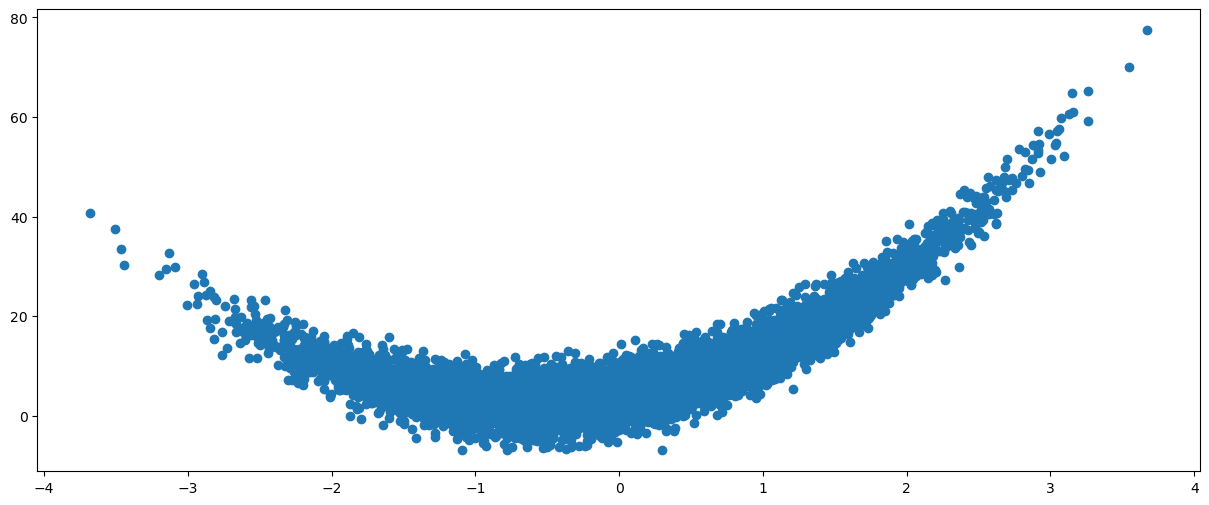

In [159]:
plt.figure(figsize=(15,6))
plt.scatter(x,y)

In [160]:
betas = find_betas(x,y)
y_hat = fit_model(x,betas)
betas

array([8.0308982 , 5.05016923])

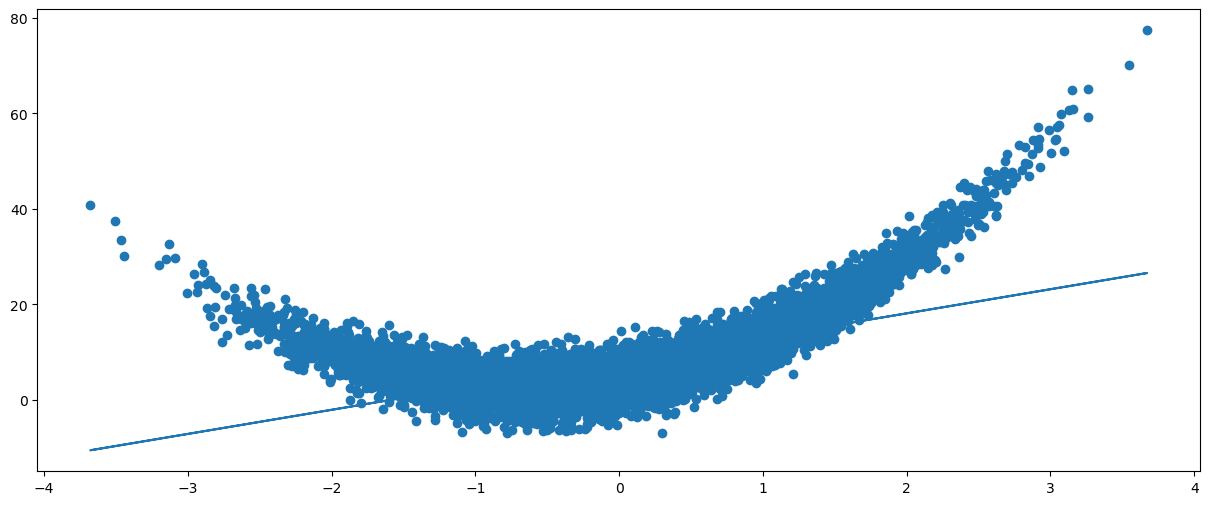

In [161]:
plt.figure(figsize=(15,6))
plt.scatter(x,y)
plt.plot(x,y_hat)

In [162]:
sse = square_error(y ,y_hat) 
sst = square_error(y ,y.mean())
ssr = sst-sse
squar_r = r_square(ssr,sst)
squar_r


0.3897973794056326

In [163]:
new_x = transform_x(x,2)

In [164]:
betas = find_betas(new_x,y)
y_hat = fit_model(new_x,betas)
betas


array([4.01587783, 4.95717164, 4.00177433])

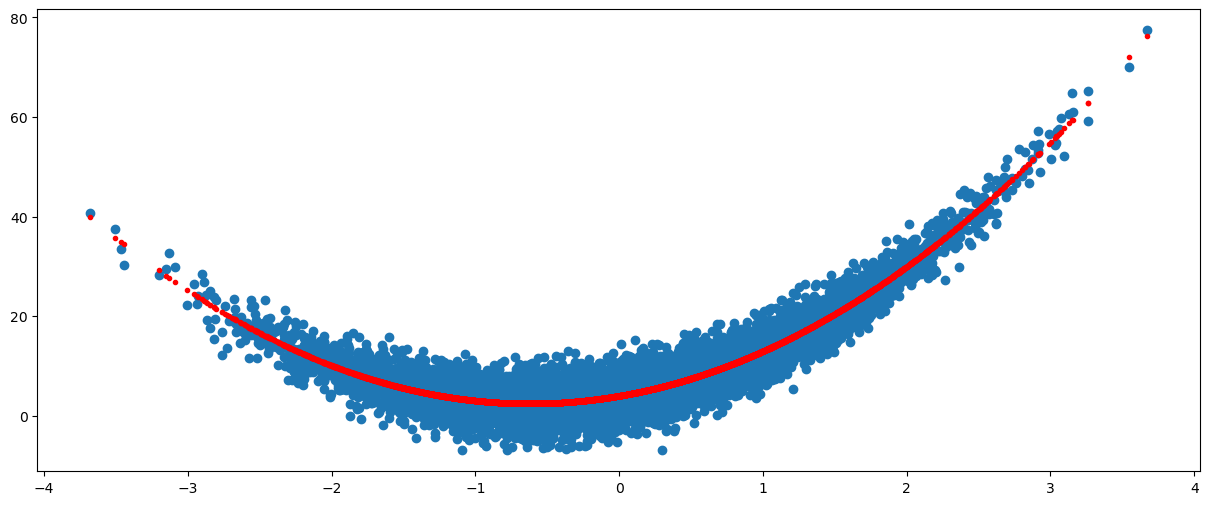

In [165]:
plt.figure(figsize=(15,6))
plt.scatter(x,y)
plt.plot(x,y_hat,'r.')

In [166]:
sse = square_error(y ,y_hat) 
sst = square_error(y ,y.mean())
ssr = sst-sse
squar_r = r_square(ssr,sst)
squar_r

0.8629416075222712